In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [75]:
data_set=pd.read_csv("Algerian_forest_fires_dataset_cleaned.csv")
data_set.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [76]:
data_set.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

FWI AND CLASSES ARE OUR DEPENDENT FEAUTURE y
OTHERS ARE INDEPENDENT FEATURE X

In [77]:
data_set.drop(['day','month','year'],axis=1,inplace=True)
data_set.tail()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1
242,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,not fire,1


In [78]:
data_set["Classes"].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [79]:
data_set["Classes"]=np.where(data_set["Classes"].str.contains("not fire"),0,1)

In [80]:
data_set

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1


In [81]:
data_set["Classes"].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

AB features divide karna hai


In [82]:
X=data_set.drop("FWI",axis=1)
y=data_set['FWI']
print(X)
print(y)

     Temperature  RH  Ws  Rain  FFMC   DMC    DC  ISI   BUI  Classes  Region
0             29  57  18   0.0  65.7   3.4   7.6  1.3   3.4        0       0
1             29  61  13   1.3  64.4   4.1   7.6  1.0   3.9        0       0
2             26  82  22  13.1  47.1   2.5   7.1  0.3   2.7        0       0
3             25  89  13   2.5  28.6   1.3   6.9  0.0   1.7        0       0
4             27  77  16   0.0  64.8   3.0  14.2  1.2   3.9        0       0
..           ...  ..  ..   ...   ...   ...   ...  ...   ...      ...     ...
238           30  65  14   0.0  85.4  16.0  44.5  4.5  16.9        1       1
239           28  87  15   4.4  41.1   6.5   8.0  0.1   6.2        0       1
240           27  87  29   0.5  45.9   3.5   7.9  0.4   3.4        0       1
241           24  54  18   0.1  79.7   4.3  15.2  1.7   5.1        0       1
242           24  64  15   0.2  67.3   3.8  16.5  1.2   4.8        0       1

[243 rows x 11 columns]
0      0.5
1      0.4
2      0.1
3      0.0
4      

TRAIN_TEST SPILIT

In [83]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [84]:
X_train

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
97,29,74,19,0.1,75.8,3.6,32.2,2.1,5.6,0,0
141,31,72,14,0.2,60.2,3.8,8.0,0.8,3.7,0,1
192,40,31,15,0.0,94.2,22.5,46.3,16.6,22.4,1,1
68,32,60,18,0.3,77.1,11.3,47.0,2.2,14.1,0,0
119,32,47,14,0.7,77.5,7.1,8.8,1.8,6.8,0,0
...,...,...,...,...,...,...,...,...,...,...,...
106,24,82,15,0.4,44.9,0.9,7.3,0.2,1.4,0,0
14,28,80,17,3.1,49.4,3.0,7.4,0.4,3.0,0,0
92,25,76,17,7.2,46.0,1.3,7.5,0.2,1.8,0,0
179,34,59,16,0.0,88.1,19.5,47.2,7.4,19.5,1,1


In [85]:
y_train

97      0.9
141     0.3
192    21.6
68      2.6
119     0.9
       ... 
106     0.0
14      0.1
92      0.1
179    10.9
102     0.3
Name: FWI, Length: 182, dtype: float64

check for multi colinearity   iska matlab independent feature tumare apas me co related hai faltu hata do

<Axes: >

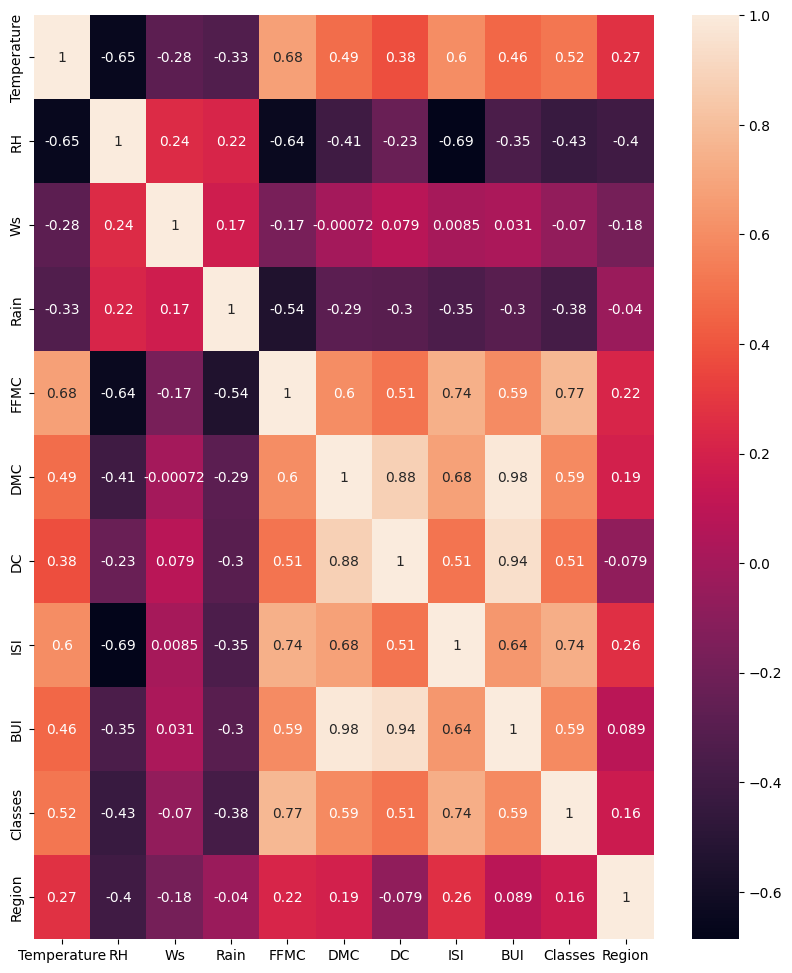

In [86]:
plt.figure(figsize=(10,12))
sns.heatmap(X.corr(),annot=True)

In [87]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: 
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [88]:
Corr_features=correlation(X_train,0.85)

#this threshold is set by domain expert we can remove BUI and DC

#drop features when correlation is more than 0.85

In [89]:
X_train.drop(Corr_features,axis=1,inplace=True)
X_test.drop(Corr_features,axis=1,inplace=True)
X_train.columns.value_counts()


Temperature    1
RH             1
Ws             1
Rain           1
FFMC           1
DMC            1
ISI            1
Classes        1
Region         1
Name: count, dtype: int64

STANDARDZILATION FOR X_train and X_test

In [90]:
from sklearn.preprocessing import StandardScaler
Scaler=StandardScaler()

In [91]:
X_train_standardized=Scaler.fit_transform(X_train)
X_test_standardized=Scaler.transform(X_test)

BOX PLOT IS FOR EFFECT OF STANDARD SCALAR FOR OUTLIERS

Text(0.5, 1.0, 'after  standardization')

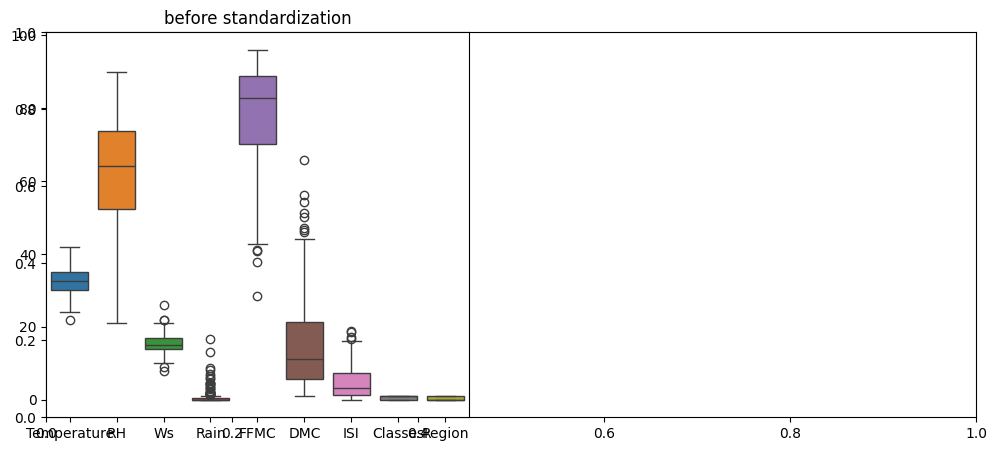

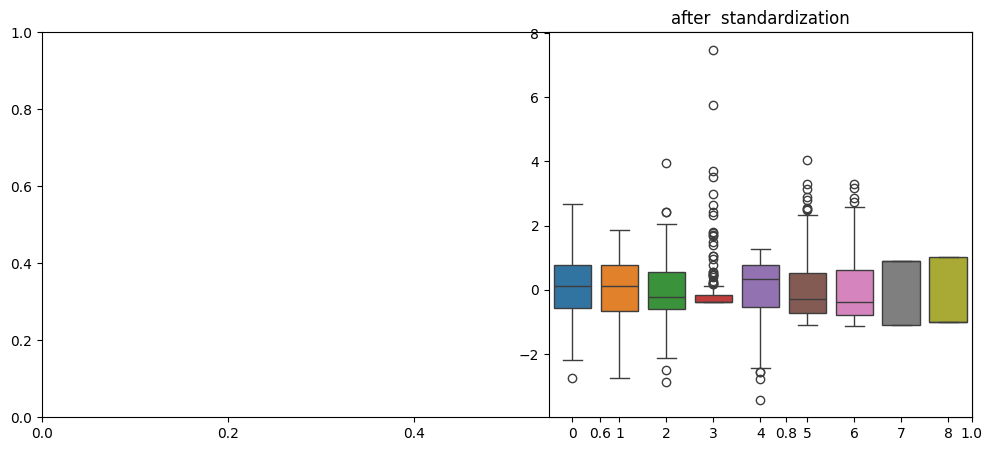

In [98]:
plt.subplots(figsize=(12,5))
plt.subplot(1,2,1)
sns.boxplot(data=X_train)
plt.title("before standardization")


plt.subplots(figsize=(12,5))
plt.subplot(1,2,2)
sns.boxplot(data=X_train_standardized)
plt.title("after  standardization")


LINEAR REGRESSION MODEL TRAINING

In [105]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
regression=LinearRegression()
regression.fit(X_train_standardized,y_train)
mae=mean_squared_error(y_test,regression.predict(X_test_standardized))
print(f"THE MEAN SQAURE EROR IS : {mae}")
accuracy=r2_score(y_test,regression.predict(X_test_standardized))
print(f"THE ACCURACY OF MODEL WITH LINEAR REGRESSION IS :{accuracy*100}")
                  

THE MEAN SQAURE EROR IS : 0.674276687379158
THE ACCURACY OF MODEL WITH LINEAR REGRESSION IS :98.47657384266951


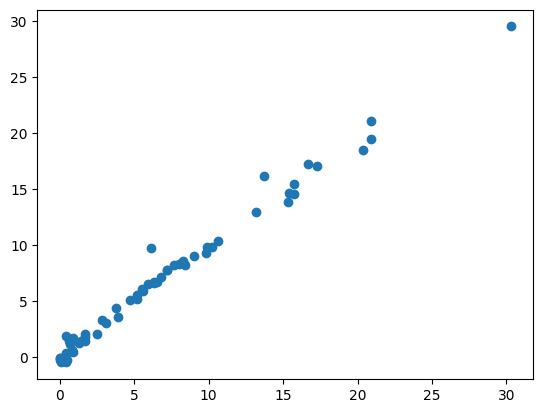

In [106]:
plt.scatter(y_test,regression.predict(X_test_standardized))

APPLY LASSO REGRESSION OR L2 REGULALIZATION for reduce overfiiting

In [107]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error,r2_score
lasso_regression=Lasso()
lasso_regression.fit(X_train_standardized,y_train)
mae=mean_squared_error(y_test,lasso_regression.predict(X_test_standardized))
print(f"THE MEAN SQAURE EROR IS : {mae}")
accuracy=r2_score(y_test,lasso_regression.predict(X_test_standardized))
print(f"THE ACCURACY OF MODEL WITH LINEAR REGRESSION IS :{accuracy*100}")
                  

THE MEAN SQAURE EROR IS : 2.2483458918974772
THE ACCURACY OF MODEL WITH LINEAR REGRESSION IS :94.92020263112389


APPLY L1 regression /ridge for feature selection

In [108]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error,r2_score
ridge_regression=Ridge()
ridge_regression.fit(X_train_standardized,y_train)
mae=mean_squared_error(y_test,ridge_regression.predict(X_test_standardized))
print(f"THE MEAN SQAURE EROR IS : {mae}")
accuracy=r2_score(y_test,ridge_regression.predict(X_test_standardized))
print(f"THE ACCURACY OF MODEL WITH LINEAR REGRESSION IS :{accuracy*100}")
                  

THE MEAN SQAURE EROR IS : 0.6949198918152096
THE ACCURACY OF MODEL WITH LINEAR REGRESSION IS :98.42993364555512


COMBINING BOTH L1 and L2


In [112]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error,r2_score
L1_L2=ElasticNet()
L1_L2.fit(X_train_standardized,y_train)
mae=mean_squared_error(y_test,L1_L2.predict(X_test_standardized))
print(f"THE MEAN SQAURE EROR IS : {mae}")
accuracy=r2_score(y_test,L1_L2.predict(X_test_standardized))
print(f"THE ACCURACY OF MODEL WITH LINEAR REGRESSION IS :{accuracy*100}")
                  

THE MEAN SQAURE EROR IS : 5.5172511010252245
THE ACCURACY OF MODEL WITH LINEAR REGRESSION IS :87.53460589519703


UPER ABHI TAK CROSS VALIDATION Nhi kiye abb karne wale hai

CROSS validation LASSO

In [113]:
from sklearn.linear_model import LassoCV
lasso_CV=LassoCV(cv=5)
lasso_CV.fit(X_train_standardized,y_train)

,eps,0.001
,n_alphas,'deprecated'
,alphas,'warn'
,fit_intercept,True
,precompute,'auto'
,max_iter,1000
,tol,0.0001
,copy_X,True
,cv,5
,verbose,False
,n_jobs,None


In [114]:
lasso_CV.predict(X_test_standardized)

array([ 8.17490595,  7.68312478, -0.25676525,  4.72643402,  6.78715772,
        1.77624325,  2.23148094,  7.64057821,  1.99176323,  3.39941035,
        0.62808928,  9.95945488,  9.36168319, 16.98503659, 18.28488762,
        1.61644108,  1.62751276, -0.6415713 ,  7.28510526,  3.10926518,
        1.95541903,  0.18069335,  6.47563129,  0.14318503, 20.99597009,
        5.11755206,  5.86208849,  9.75914403, -0.77037467,  9.91838577,
        6.72277075, -0.31776007, 10.31109643, 14.4365551 ,  1.71022677,
        0.83439752,  2.03414915,  5.97488529, -0.6263644 , -0.56200288,
        6.47253729,  2.07971408,  8.46741557, -0.8464481 , 15.40443856,
        8.32941189,  8.48782486,  1.44030355, 13.02752812,  1.20911545,
       29.08623849,  5.49737681, 17.15937199, 19.28890096, 13.71102991,
       16.05355549,  0.99056448,  9.0873725 ,  3.84455993, 14.43991192,
        5.23034139])

In [115]:
lasso_CV.alpha_

np.float64(0.05725391318234408)

In [117]:
lasso_CV.alphas_

array([7.05853002, 6.58280872, 6.13914944, 5.72539132, 5.33951911,
       4.97965339, 4.64404142, 4.33104857, 4.03915039, 3.76692517,
       3.51304702, 3.27627941, 3.05546914, 2.84954075, 2.65749124,
       2.47838523, 2.31135036, 2.15557308, 2.01029467, 1.87480753,
       1.74845178, 1.63061198, 1.52071419, 1.41822315, 1.32263965,
       1.23349817, 1.15036452, 1.0728338 , 1.00052839, 0.93309613,
       0.87020857, 0.81155943, 0.75686304, 0.705853  , 0.65828087,
       0.61391494, 0.57253913, 0.53395191, 0.49796534, 0.46440414,
       0.43310486, 0.40391504, 0.37669252, 0.3513047 , 0.32762794,
       0.30554691, 0.28495408, 0.26574912, 0.24783852, 0.23113504,
       0.21555731, 0.20102947, 0.18748075, 0.17484518, 0.1630612 ,
       0.15207142, 0.14182231, 0.13226397, 0.12334982, 0.11503645,
       0.10728338, 0.10005284, 0.09330961, 0.08702086, 0.08115594,
       0.0756863 , 0.0705853 , 0.06582809, 0.06139149, 0.05725391,
       0.05339519, 0.04979653, 0.04644041, 0.04331049, 0.04039

5 cv hai aur 100 baar iteration hai toh 500 mse nikla

In [118]:
lasso_CV.mse_path_

array([[53.64536329, 65.39074075, 54.89628985, 77.90299066, 39.38236846],
       [46.99139716, 59.81506814, 49.29840831, 75.6645852 , 35.31758355],
       [41.14908917, 53.9178721 , 42.49594889, 68.35708298, 31.76996123],
       [36.05788169, 48.41773965, 36.66879347, 61.92819453, 28.67296816],
       [31.62067285, 42.76466229, 31.68391904, 56.26841266, 24.93183295],
       [27.75285367, 37.81922812, 27.42599138, 51.28216115, 21.56888645],
       [24.3807738 , 33.49107651, 23.7950306 , 45.25481907, 18.66094162],
       [21.44052804, 29.70161639, 20.70460191, 39.90418045, 16.14837778],
       [18.876308  , 26.38208059, 18.07969934, 35.23429953, 13.97821475],
       [16.63960395, 23.47341883, 15.85530749, 31.15712074, 12.10483403],
       [14.68819307, 20.92329068, 13.97555108, 27.59649208, 10.48862803],
       [12.98525144, 18.68636627, 12.39173305, 24.48611006,  9.09521221],
       [11.49893734, 16.72312788, 11.06186319, 21.7677198 ,  7.89445038],
       [10.2013182 , 14.9991189 ,  9.9

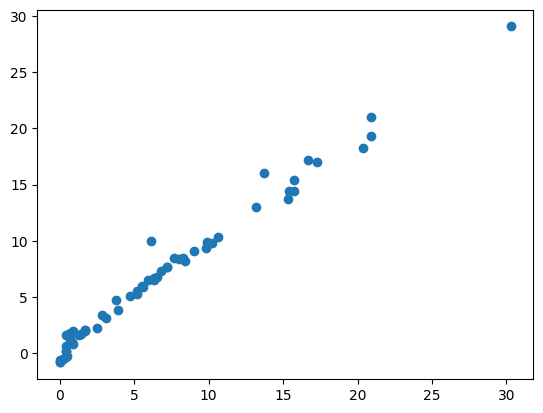

In [119]:
y_pred=lasso_CV.predict(X_test_standardized)
plt.scatter(y_test,y_pred)


In [120]:
accuracy=r2_score(y_test,lasso_CV.predict(X_test_standardized))
print(f"THE ACCURACY OF MODEL WITH LINEAR REGRESSION IS :{accuracy*100}")
                  

THE ACCURACY OF MODEL WITH LINEAR REGRESSION IS :98.20946715928275


NOW CROSS VALIDATION WITH L2 regulaization BY default LEAVE ONE OUT CV

Mean absolute error 0.6949198918152096
R2 Score 0.9842993364555512


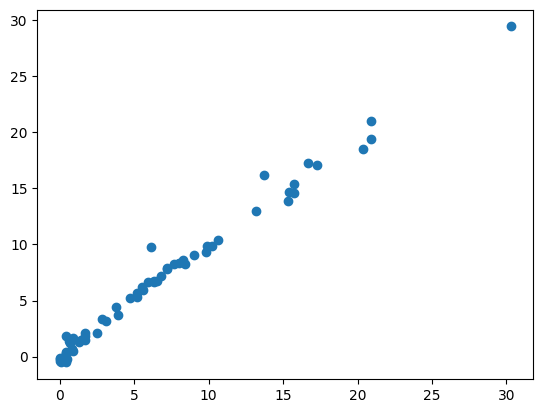

In [122]:
from sklearn.linear_model import RidgeCV
Ridge_CV=RidgeCV(cv=5)
Ridge_CV.fit(X_train_standardized,y_train)
y_pred=Ridge_CV.predict(X_test_standardized)
plt.scatter(y_test,y_pred)
mae=mean_squared_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)

In [123]:
Ridge_CV.alpha_

np.float64(1.0)

In [125]:
Ridge_CV.alphas

(0.1, 1.0, 10.0)

In [127]:
Ridge_CV.get_params()

{'alpha_per_target': False,
 'alphas': (0.1, 1.0, 10.0),
 'cv': 5,
 'fit_intercept': True,
 'gcv_mode': None,
 'scoring': None,
 'store_cv_results': False}

Mean absolute error 0.8222830416276258
R2 Score 0.9814217587854941


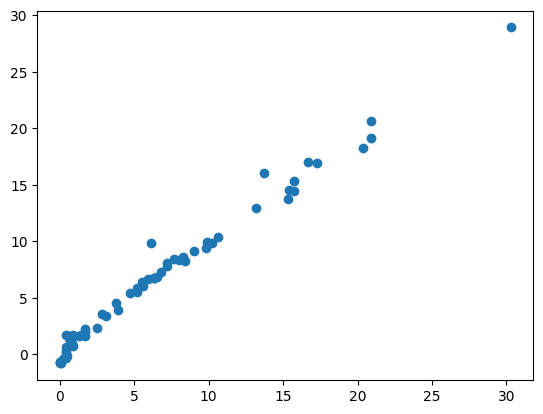

In [129]:
from sklearn.linear_model import ElasticNetCV
elasticcv=ElasticNetCV(cv=5)
elasticcv.fit(X_train_standardized,y_train)
y_pred=elasticcv.predict(X_test_standardized)
plt.scatter(y_test,y_pred)
mae=mean_squared_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)

FOR DEPLOYMENT OF MODEL WE HAVE TO DO THE PICKLE THE MACHINE LEARNING MODEL AND PREPROCESSING MODEL STANDARD SCALAR

In [130]:
Scaler

,copy,True
,with_mean,True
,with_std,True


In [136]:
Ridge_CV

,alphas,"(0.1, ...)"
,fit_intercept,True
,scoring,None
,cv,5
,gcv_mode,None
,store_cv_results,False
,alpha_per_target,False


In [135]:
import pickle
pickle.dump(Scaler,open('scaler.pkl','wb'))
pickle.dump(Ridge_CV,open('ridge.pkl','wb'))